<a href="https://colab.research.google.com/github/1952ma/p7/blob/main/p7_notebook_modeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chargement des données

In [ ]:
import pandas as pd

df = pd.read_csv('df_clean_imputed.csv', sep = ',')
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,7492.924286,52450.470,6605.910,12815.010,7492.924286,52450.470,-38.0,-156.285714,-1094.0,7.0
307503,456252,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,10069.867500,60419.205,10046.880,10074.465,10069.867500,60419.205,-2327.0,-2393.833333,-14363.0,6.0
307504,456253,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,4399.707857,61595.910,27.270,5575.185,4115.915357,57622.815,-1738.0,-2387.428571,-33424.0,14.0
307505,456254,1.0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,...,10239.832895,194556.825,2296.440,19065.825,10239.832895,194556.825,-18.0,-161.263158,-3064.0,19.0


#Séparation des données

In [ ]:
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

In [ ]:
#division initiale des données : 90% pour X_restant (train_initial et final) et 10% pour X_nouveaux_clients (test)
#un sample sera pris des 90% pour la recherche des hyperparametres
#le model final sera entrainé sur toutes les données le 100% des 90%

X_restant, X_nouveaux_clients, y_restant, y_nouveaux_clients = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

#maintenant je continue avec X_restant et y_restant
X_restant = X_restant.drop(columns=["SK_ID_CURR"])

In [ ]:
X_nouveaux_clients.shape

(30751, 625)

In [ ]:
X_nouveaux_clients.to_csv('df_clients.csv', index=False)
X_restant.to_csv('df_restant.csv', index=False)

Sample

In [ ]:
#pour obtenir un échantillon stratifié en fonction de la distribution de la classe

# La taille de l'échantillon total
sample_size = 10000

#je calcule la proportion des classes
class_d = df['TARGET'].value_counts(normalize=True)

#l'échantillon stratifié en fonction de la distribution de 'TARGET'
df_sample = df.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_d.loc[x.name]), random_state=42))

#la distribution dans l'échantillon
print(df_sample['TARGET'].value_counts(normalize=True))
df_sample

TARGET
0.0    0.919292
1.0    0.080708
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_11964\2152920594.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_d.loc[x.name]), random_state=42))


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
150486,274455,0.0,1,1,0,2,202500.0,270000.0,13500.0,270000.0,...,194407.905000,1166447.430,47071.215,931091.355,194407.905000,1166447.430,-280.0,-336.000000,-2016.0,6.0
136656,258502,0.0,0,1,0,0,157500.0,1125000.0,33025.5,1125000.0,...,6638.261875,477954.855,2.160,73340.820,5676.277500,408691.980,-27.0,-888.722222,-63988.0,72.0
136808,258682,0.0,1,1,0,0,135000.0,1113840.0,44302.5,900000.0,...,41037.555732,3365079.570,3.150,214156.260,37542.043537,3078447.570,-381.0,-1186.548780,-97297.0,82.0
18793,121915,0.0,1,0,0,2,94500.0,177903.0,12510.0,148500.0,...,11858.130865,616622.805,3168.135,25853.625,11858.130865,616622.805,-163.0,-1369.076923,-71192.0,52.0
188846,318940,0.0,1,0,0,2,90000.0,1100709.0,46764.0,1012500.0,...,19073.400000,114440.400,19070.100,19074.060,19073.400000,114440.400,-228.0,-300.833333,-1805.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275327,419073,1.0,1,0,0,2,90000.0,1125000.0,37309.5,1125000.0,...,6886.125000,110178.000,6886.125,6886.125,6886.125000,110178.000,-41.0,-269.812500,-4317.0,16.0
149995,273887,1.0,0,0,1,0,157500.0,203760.0,16096.5,180000.0,...,7649.557423,742007.070,1.620,17340.030,6433.859227,624084.345,-27.0,-719.000000,-69743.0,97.0
270260,413228,1.0,1,0,0,1,180000.0,254700.0,24939.0,225000.0,...,11276.261557,687851.955,113.490,18090.495,10254.931967,625550.850,-34.0,-1161.426230,-70847.0,61.0
8799,110232,1.0,1,1,0,2,157500.0,1125000.0,44748.0,1125000.0,...,6492.307500,51938.460,2.520,6492.015,3246.153750,25969.230,-2792.0,-2851.000000,-22808.0,8.0


In [ ]:
df_sample.to_csv("df_sample.csv", index=False)

#Entrainement des modèles de classification

In [ ]:
import pandas as pd

#le fichier CSV
df_sample  = pd.read_csv('df_sample.csv', sep = ',')

In [ ]:
import logging
import time
import pandas as pd
import numpy as np
import gc
import mlflow
import optuna
import matplotlib.pyplot as plt
import joblib  # Pour sauvegarder le modèle et le scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
X = df_sample.drop(columns=["TARGET"])
y = df_sample["TARGET"]

In [ ]:
#division initiale des données : 80% pour X_restant (train)
X_restant, X_nouveaux_clients, y_restant, y_nouveaux_clients = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#maintenant je continue avec X_restant et y_restant
X_restant = X_restant.drop(columns=["SK_ID_CURR"])

##Standarisation des données

In [ ]:
#je standardise les données (les 80% (x_restant)) (les valeurs => sur la même échelle :moyenne = 0, écart-type = 1) pour aider le modèle à mieux apprendre
scaler = StandardScaler()
X_restant_scaled = scaler.fit_transform(X_restant)

#je maintient le df pour les indices
X_restant_scaled = pd.DataFrame(X_restant_scaled, index=X_restant.index, columns=X_restant.columns)

#enregistrement du scaler pour une utilisation ultérieure dans l'API
joblib.dump(scaler, 'C:/Users/HP/Documents/p7_modele_scoring/api/scaler_final.joblib')



['C:/Users/HP/Documents/p7_modele_scoring/api/scaler_final.joblib']

In [ ]:

#division de X_restant_scaled en 20% pour l'entraînement initial et pour l'entraînement final je prend
#X_restant_scaled et y_restant

X_train_initial, X_train_final, y_train_initial, y_train_final = train_test_split(
    X_restant_scaled, y_restant, test_size=0.8, random_state=42, stratify=y_restant
)

In [ ]:
X_train_initial.to_csv('X_train_eval.csv', index=False)
y_train_initial.to_csv('y_train_eval.csv', index=False)
X_restant_scaled.to_csv('X_final.csv', index=False)
y_restant.to_csv('y_final.csv', index=False)

###Logistic Regression

In [ ]:
import pandas as pd

#le fichier CSV
X_train_eval  = pd.read_csv('X_train_eval.csv', sep = ',')
y_train_eval  = pd.read_csv('y_train_eval.csv', sep = ',')
X_final  = pd.read_csv('X_final.csv', sep = ',')
y_final  = pd.read_csv('y_final.csv', sep = ',')

In [ ]:
#SMOTE : Pour équilibrer les classes dans l'entraînement.
smote = SMOTE()


In [ ]:
#Validation croisée avec StratifiedKFold pour garantir que la proportion de classes est respectée dans chaque pli de validation

cv = StratifiedKFold(n_splits=5)

In [ ]:
'''#la suite de regression linéaire sans ther...


# Entraînement final avec les meilleurs paramètres sur l'ensemble final
final_model_lr = LogisticRegression(**best_params_lr, random_state=42)

# Application de SMOTE sur les données finales
X_train_final_smote_lr, y_train_final_smote_lr = smote.fit_resample(X_final, y_final)

# Entraîner le modèle final
final_model_lr.fit(X_train_final_smote_lr, y_train_final_smote_lr)'''



In [ ]:

'''
# Prédictions de probabilités sur les données de test final
y_prob_final_lr = final_model_lr.predict_proba(X_test_final)[:, 1]

# Utilisation d'un seuil par défaut de 0.5 pour classifier
y_pred_final_lr = y_prob_final_lr > 0.5

# Enregistrement du modèle final
joblib.dump(final_model_lr, 'logistic_regression_model_final.joblib')'''

In [ ]:
#à la recherche des best params avec tacking mlflow

from sklearn.linear_model import LogisticRegression

#sauvegarde dans results
results = []

#nb de runs
nb_runs = 30

#configuration de base
#le logger Optuna pour optimiser les hyperparamètres du modèle
logging.getLogger('optuna').setLevel(logging.CRITICAL)

#démarrage du chronomètre pour voir combien de temps l’entraînement va prendre
start_time = time.time()

#MLflow va enregistrer toutes les expériences sous le nom "Logistic_Regression" (sur l'interface avec:  mlflow ui)
mlflow.set_experiment('Logistic_Regression')


#la fonction objective_tr pour Optuna et la régression logistique
def objective_lr(trial):
    #les hyperparamètres à optimiser
    model = LogisticRegression(
        C=trial.suggest_float('C', 50, 200, log=True),
        solver=trial.suggest_categorical('solver', ['liblinear', 'lbfgs']),
        max_iter=trial.suggest_int('max_iter', 100, 1000),
        random_state=42
    )

    auc_scores, acc_scores, cost_scores = [], [], []

    #la validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_train_eval, y_train_eval):
        X_train, X_test = X_train_eval.iloc[train_idx], X_train_eval.iloc[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        #l'application de SMOTE
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        #j'entraîne le modèle de régression logistique
        model.fit(X_train_smote, y_train_smote)

        #prédictions de probabilités
        y_prob = model.predict_proba(X_test)[:, 1]

        #j'utilise un seuil par défaut de 0.5 pour classifier
        y_pred = y_prob > 0.5

        #calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    #la moyenne des résultats
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    results.append({"AUC": auc, "Accuracy": acc, "Business Score": cost})

    #l'enregistrement avec MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        #l'enregistrement de la courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_lr.png")
        plt.close()
        mlflow.log_artifact("roc_curve_lr.png")

        mlflow.sklearn.log_model(model, "logistic_regression_model")

    gc.collect()
    return cost

#l'optimisation avec Optuna pour la Régression Logistique
study_lr = optuna.create_study(direction='minimize')
study_lr.optimize(objective_lr, n_trials=nb_runs)


#affiche combien de temps tout l’entraînement a pris
end_time = time.time()
print(f"Temps d'exécution total: {end_time - start_time:.2f} secondes")

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was 

Temps d'exécution total: 427.70 secondes


In [ ]:
#les meilleurs résultats pour Logistic Regression
best_params_lr = study_lr.best_params
best_auc_lr = study_lr.best_value
best_acc_lr = max([res['Accuracy'] for res in results])
best_cost_lr = min([res['Business Score'] for res in results])

#l'affichage des meilleurs hyperparamètres pour la Régression Logistique
print(study_lr.best_params)

{'C': 50.006866506132724, 'solver': 'liblinear', 'max_iter': 840, 'threshold': 0.48000000000000004}


In [ ]:

with mlflow.start_run():
    mlflow.log_params(best_params_lr)

In [ ]:

#l'enregistrement des meilleurs paramètres dans un fichier
joblib.dump(best_params_lr, 'best_params_lr.pkl')

['best_params_lr.pkl']

In [ ]:
'''#pour charger les best_param apres
best_params_lr = joblib.load('best_params_lr.pkl')
print(best_params_lr)'''


In [ ]:
#entraînement final de Logistic Regression avec les meilleurs paramètres sur l'ensemble final

#démarrage du chronomètre pour voir combien de temps l’entraînement va prendre
start_time = time.time()

#entraînement final avec les meilleurs paramètres sur l'ensemble final
final_model_lr = LogisticRegression(**best_params_lr, random_state=42)

#l'application de SMOTE sur les données finales
X_train_final_smote_lr, y_train_final_smote_lr = smote.fit_resample(X_final, y_final)

#entraîner le modèle final
final_model_lr.fit(X_train_final_smote_lr, y_train_final_smote_lr)

#affiche combien de temps tout l’entraînement a pris
end_time = time.time()
print(f"Temps d'exécution total: {end_time - start_time:.2f} secondes")

'''# Prédictions de probabilités sur les données de test final
y_prob_final_lr = final_model_lr.predict_proba(X_test_final)[:, 1]

# Utilisation d'un seuil par défaut de 0.5 pour classifier
y_pred_final_lr = y_prob_final_lr > 0.5'''

#l'enregistrement du modèle final
joblib.dump(final_model_lr, 'logistic_regression_model_f.joblib')

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Temps d'exécution total: 16.85 secondes


['logistic_regression_model_f.joblib']

In [ ]:
#results contient tous les résultats des métriques
import pandas as pd

#convertir la liste de résultats en df
results_df = pd.DataFrame(results)

#trier par Accuracy
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

#les résultats triés
results_df_sorted.head(30)


,AUC,Accuracy,Business Score
3,0.625033,0.819259,228.8
18,0.627954,0.819259,216.2
7,0.623492,0.818005,229.2
10,0.627497,0.816759,220.6
26,0.626305,0.816134,228.0
0,0.625206,0.814882,226.6
29,0.627668,0.811136,227.8
9,0.615665,0.806113,215.0
20,0.615207,0.804238,215.6
6,0.616126,0.804238,215.6


In [ ]:
#exporter les résultats dans un fichier CSV
results_df.to_csv('results_logistic_regression.csv', index=False)
print("Les résultats ont été exportés dans 'results_logistic_regression.csv'")


Les résultats ont été exportés dans 'results_logistic_regression.csv'


###Random Forest

In [ ]:
import logging
import time
import numpy as np
import joblib
import gc
import matplotlib.pyplot as plt
import mlflow
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

#initialisation des résultats
results_rf = []

#configuration de base
logging.getLogger('optuna').setLevel(logging.CRITICAL)

#démarrage du chronomètre pour voir combien de temps l’entraînement va prendre
start_time = time.time()

#MLflow pour enregistrer toutes les expériences
mlflow.set_experiment('Random_Forest_Classifier')

#initialisation de SMOTE
smote = SMOTE(random_state=42)

#initialisation de la validation croisée: 5 folds
cv = StratifiedKFold(n_splits=5)

#la fonction objective_rf pour Optuna et Random Forest

def objective_rf(trial):
    #les hyperparamètres à optimiser
    model = RandomForestClassifier(
        #le nb d'arbres
        n_estimators=trial.suggest_int('n_estimators', 100, 1000, log=True),
        #la profondeur maximale des arbres
        max_depth=trial.suggest_int('max_depth', 5, 50),
        #le nb de features
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        #le nb minimum d'échantillons pour diviser un nœud
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        random_state=42
    )

    auc_scores, acc_scores, cost_scores = [], [], []

    #la validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_train_eval, y_train_eval):
        X_train, X_test = X_train_eval.iloc[train_idx], X_train_eval.iloc[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        #application de SMOTE
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        #j'entraîne le modèle Random Forest
        model.fit(X_train_smote, y_train_smote)

        #la prédictions de probabilités
        y_prob = model.predict_proba(X_test)[:, 1]

        #calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_prob > 0.5))  # Seuil par défaut de 0.5

        tn, fp, fn, tp = confusion_matrix(y_test, y_prob > 0.5).ravel()
        cost_scores.append(fp + 10 * fn)

    #la moyenne des résultats
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    results_rf.append({"AUC": auc, "Accuracy": acc, "Business Score": cost})

    #l'enregistrement avec MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        #l'enregistrement de la courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_rf.png")
        plt.close()
        mlflow.log_artifact("roc_curve_rf.png")

        mlflow.sklearn.log_model(model, "random_forest_model")

    gc.collect()
    return cost

#l'optimisation avec Optuna pour Random Forest
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=30)  # Ajuste n_trials selon tes besoins

#pour afficher combien de temps tout l’entraînement a pris
end_time = time.time()
print(f"Temps d'exécution total: {end_time - start_time:.2f} secondes")

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed

Temps d'exécution total: 4825.07 secondes


In [ ]:
#les meilleurs hyperparamètres pour Random Forest
print(study_rf.best_params)

{'n_estimators': 154, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5}


In [ ]:
best_params_rf = study_rf.best_params
with mlflow.start_run():
    mlflow.log_params(best_params_rf)

In [ ]:
#l'enregistrement des meilleurs paramètres dans un fichier
joblib.dump(best_params_rf, 'best_params_rf.pkl')

['best_params_rf.pkl']

In [ ]:
'''#pour charger les best_param apres
best_params_rf = joblib.load('best_params_rf.pkl')
print(best_params_rf)'''

In [ ]:
#les meilleurs résultats pour Random Forest
best_params_rf = study_rf.best_params
best_auc_rf = study_rf.best_value
best_acc_rf = max([res['Accuracy'] for res in results_rf])
best_cost_rf = min([res['Business Score'] for res in results_rf])

In [ ]:
#results_rf contient tous les résultats

import pandas as pd

#convertir la liste de résultats en df
df_results_rf = pd.DataFrame(results_rf)

#trier par Accuracy
df_results_rf_sorted = df_results_rf.sort_values(by='Accuracy', ascending=False)

#les résultats triés
df_results_rf_sorted.head(30)

,AUC,Accuracy,Business Score
13,0.674260,0.919953,254.2
19,0.669661,0.919953,254.2
25,0.663620,0.919951,254.2
27,0.676713,0.919326,254.4
20,0.663604,0.919326,254.4
9,0.694751,0.918076,254.8
7,0.681047,0.917451,256.8
12,0.676631,0.917451,255.0
1,0.692542,0.917451,255.0
2,0.655978,0.917451,253.2


In [ ]:
#les résultats par essai:
for idx, res in enumerate(results_rf):
    print(f"Essai {idx + 1}: AUC = {res['AUC']:.4f}, Accuracy = {res['Accuracy']:.4f}, Business Score = {res['Business Score']:.2f}")

Essai 1: AUC = 0.6801, Accuracy = 0.8981, Business Score = 252.20
Essai 2: AUC = 0.6925, Accuracy = 0.9175, Business Score = 255.00
Essai 3: AUC = 0.6560, Accuracy = 0.9175, Business Score = 253.20
Essai 4: AUC = 0.6603, Accuracy = 0.8780, Business Score = 242.40
Essai 5: AUC = 0.6779, Accuracy = 0.9049, Business Score = 248.20
Essai 6: AUC = 0.6797, Accuracy = 0.8974, Business Score = 252.40
Essai 7: AUC = 0.6781, Accuracy = 0.8987, Business Score = 252.00
Essai 8: AUC = 0.6810, Accuracy = 0.9175, Business Score = 256.80
Essai 9: AUC = 0.6837, Accuracy = 0.8974, Business Score = 254.20
Essai 10: AUC = 0.6948, Accuracy = 0.9181, Business Score = 254.80
Essai 11: AUC = 0.6656, Accuracy = 0.9056, Business Score = 251.60
Essai 12: AUC = 0.6621, Accuracy = 0.8762, Business Score = 243.00
Essai 13: AUC = 0.6766, Accuracy = 0.9175, Business Score = 255.00
Essai 14: AUC = 0.6743, Accuracy = 0.9200, Business Score = 254.20
Essai 15: AUC = 0.6561, Accuracy = 0.8793, Business Score = 242.00
Essa

In [ ]:
#exporter les résultats dans un fichier CSV
df_results_rf.to_csv('results_Random_Forest.csv', index=False)
print("Les résultats ont été exportés dans 'results_Random_Forest.csv'")

Les résultats ont été exportés dans 'results_Random_Forest.csv'


In [ ]:
#entraînement final Random Forest avec les meilleurs paramètres sur l'ensemble final

#démarrage du chronomètre pour voir combien de temps l’entraînement va prendre
start_time = time.time()

best_params_rf = study_rf.best_params
final_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)

#l'application de SMOTE sur les données finales
X_train_final_smote_rf, y_train_final_smote_rf = smote.fit_resample(X_final, y_final)

#l'entraînement du modèle final
final_model_rf.fit(X_train_final_smote_rf, y_train_final_smote_rf)

#affiche combien de temps tout l’entraînement a pris
end_time = time.time()
print(f"Temps d'exécution total: {end_time - start_time:.2f} secondes")

'''# Prédictions de probabilités sur les données de test final
y_prob_final_rf = final_model_rf.predict_proba(X_test_final)[:, 1]

# Application du seuil par défaut de 0.5 pour les prédictions
y_pred_final_rf = y_prob_final_rf > 0.5'''

#l'enregistrement du modèle final
joblib.dump(final_model_rf, 'C:/Users/HP/Documents/p7_modele_scoring/api/random_forest_model_f.joblib')

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Temps d'exécution total: 5.77 secondes


['C:/Users/HP/Documents/p7_modele_scoring/api/random_forest_model_f.joblib']

###Light GBM

In [ ]:
import logging
import time
import numpy as np
import joblib
import gc
import matplotlib.pyplot as plt
import mlflow
import optuna
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

#initialisation des résultats
results_lgbm = []

#initialisation de SMOTE
smote = SMOTE(random_state=42)

#initialisation de la validation croisée
cv = StratifiedKFold(n_splits=5)

#le logger Optuna pour optimiser les hyperparamètres du modèle
logging.getLogger('optuna').setLevel(logging.CRITICAL)

#démarrage du chronomètre pour voir combien de temps l’entraînement va prendre
start_time = time.time()

#MLflow va enregistrer toutes les expériences sous le nom "LightGBM" (sur l'interface avec:  mlflow ui)
mlflow.set_experiment('LightGBM')

#à la recherche des meilleurs hyperparamètres avec Optuna

def objective(trial):

    #les yperparamètres à optimiser
    model = LGBMClassifier(

        #taux d'apprentissage
        learning_rate=trial.suggest_float('lr', 0.001, 0.1, log=True),

        #nombre de feuilles d'arbres dans le modèle LightGBM
        num_leaves=trial.suggest_int('num_leaves', 31, 70),

        #nombre d'estimateurs (arbres)
        n_estimators=trial.suggest_int('n_estimators', 100, 1000, log=True),
        verbose=-1
    )

    auc_scores, acc_scores, cost_scores = [], [], []

    #la validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_train_eval, y_train_eval):
        X_train, X_test = X_train_eval.iloc[train_idx], X_train_eval.iloc[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        #application de SMOTE sur les données d'entraînement
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        #entraîner le modèle avec les données SMOTE
        model.fit(X_train_smote, y_train_smote)

        #prédictions de probabilités
        y_prob = model.predict_proba(X_test)[:, 1]

        #le un seuil (threshold) pour classer les prédictions de probabilités (entre 0.4 et 0.6)
        threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)
        y_pred = y_prob > threshold

        #evaluation des métriques

        #AUC : mesure la qualité de la classification sur l'ensemble des seuils possibles
        auc_scores.append(roc_auc_score(y_test, y_prob))

        #Accuracy : taux de bonnes prédictions
        acc_scores.append(accuracy_score(y_test, y_pred))

        #business_Score : cette métrique personnalisée pèse plus fortement les faux négatifs (fn) par rapport aux faux positifs (fp)
        #avec un coût de 10 fois plus élevé pour chaque faux négatif
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)


    #la moyenne des résultats sur les plis
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    results_lgbm.append({"AUC": auc, "Accuracy": acc, "Business Score": cost})

    #enregistrement des hyperparamètres avec MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        #la courbe ROC pour visualiser la performance du modèle et est sauvegardée
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")

    #pour libérer les ressources inutilisées
    gc.collect()

    #la fonction renvoie le Business Score (cost) qui juge si les hyperparamètres testés sont meilleurs que les précédents
    return cost

#Optuna va tester plusieurs combinaisons d’hyperparamètres (ici 30 combinaisons)
# et essayer de minimiser le score de coût (faux positifs et faux négatifs)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConv

In [ ]:
#maintenant que j'ai le meilleur modèle LightGBM

#le paramètres optimisés pour LightGBM
best_params_lgbm = study.best_params
#la meilleure AUC trouvée pour LightGBM
best_auc_lgbm = study.best_value
#meilleure accuracy LightGBM
best_acc_lgbm = max([res['Accuracy'] for res in results_lgbm])
#meilleur Business Score LightGBM
best_cost_lgbm = min([res['Business Score'] for res in results_lgbm])

In [ ]:
#affichage des meilleurs paramètres et sauvegarde pour l'entrainement final
print(best_params_lgbm)

{'lr': 0.0016910182913303362, 'num_leaves': 65, 'n_estimators': 209, 'threshold': 0.41000000000000003}


In [ ]:
#results_lgbm contient tous les résultats

import pandas as pd

#convertir la liste de résultats en df
df_results_lgbm = pd.DataFrame(results_lgbm)

#trier par Accuracy
df_results_lgbm_sorted = df_results_lgbm.sort_values(by='Accuracy', ascending=False)

#les résultats triés
df_results_lgbm_sorted.head(30)

,AUC,Accuracy,Business Score
6,0.703919,0.918078,249.4
9,0.701630,0.917453,251.4
5,0.699477,0.916824,253.4
3,0.693671,0.915576,253.8
19,0.635177,0.914324,257.8
14,0.656130,0.912451,256.6
2,0.677535,0.911826,253.2
7,0.693164,0.911201,251.6
8,0.696450,0.911197,253.4
4,0.683064,0.908076,254.4


In [ ]:
#exporter les résultats dans un fichier CSV
df_results_lgbm.to_csv('results_Light_GBM.csv', index=False)
print("Les résultats ont été exportés dans 'results_Light_GBM.csv'")

Les résultats ont été exportés dans 'results_Light_GBM.csv'


In [ ]:
#l'enregistrement des meilleurs paramètres dans un fichier
joblib.dump(best_params_lgbm, 'best_params_lgbm.pkl')

['best_params_lgbm.pkl']

In [ ]:
'''#pour charger les best_param apres
best_params_lgbm = joblib.load('best_params_lgbm.pkl')
print(best_params_lgbm)'''

In [ ]:
#entraînement final avec les meilleurs hyperparamètres sur toutes les données restantes

#démarrage du chronomètre pour voir combien de temps l’entraînement va prendre
start_time = time.time()

final_model_lgbm = LGBMClassifier(**best_params_lgbm, random_state=42)
X_train_final_smote, y_train_final_smote = smote.fit_resample(X_final, y_final)
final_model_lgbm.fit(X_train_final_smote, y_train_final_smote)

#affiche combien de temps tout l’entraînement a pris
end_time = time.time()
print(f"Temps d'exécution total: {end_time - start_time:.2f} secondes")

#enregistrement du modèle final sous forme de fichier pour faire des prédictions avec une l'API
joblib.dump(final_model_lgbm, 'C:/Users/HP/Documents/p7_modele_scoring/api/lightGBM_model_f.joblib')

c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\p7_modele_scoring\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Temps d'exécution total: 40.97 secondes


['C:/Users/HP/Documents/p7_modele_scoring/api/lightGBM_model_f.joblib']

Division initiale des données :

Les données sont divisées en 90% pour l'entraînement (X_restant, y_restant) et 10% pour les nouvelles données à prédire (X_nouveaux_clients, y_nouveaux_clients).

Enregistrement du scaler :

Le scaler (StandardScaler) est sauvegardé en tant que scaler_final.pkl avec joblib.dump(scaler, 'scaler_final.pkl') pour être utilisé dans l'API pour normaliser les futures données d'entrée.

Optimisation des hyperparamètres :

Optuna est utilisé pour optimiser les hyperparamètres avec SMOTE et validation croisée sur une petite partie des données d'entraînement initial (sample).

Entraînement final :

Une fois les meilleurs hyperparamètres trouvés via Optuna, le modèle final est entraîné sur les 90% restants des données d'entraînement (X_train_final et y_train_final) avec SMOTE appliqué pour équilibrer les classes.

Enregistrement du modèle final :

Le modèle final est enregistré en tant que model_f.pkl pour être utilisé dans l'API de prédiction.

Sauvegarde des résultats :

Les résultats sont sauvegardés dans un fichier CSV (results_LGM.csv), avec un affichage des scores pour les visualiser.


#Feature Importances

l'importance relative de chaque variable (feature) dans la prédiction du modèle LightGBM.

l'importance des features est calculée en fonction de la contribution de chaque feature à la réduction de l'erreur prédictive au cours des différents splits dans les arbres de décision.

Les chiffres correspondent à combien chaque variable a contribué à l'amélioration de la performance globale du modèle.

Chiffres élevés : Variables très importantes pour les prédictions.

Chiffres faibles ou nuls : Variables peu ou pas utilisées dans la modélisation.

In [ ]:
#calcule de l'importance des features à partir du modèle final light GBM
feature_importances = final_model_lgbm.feature_importances_

#le df pour afficher les importances des features
importance_df = pd.DataFrame({

    #j'utilise les colonnes du df d'origine X
    'Feature': X.columns,
    'Importance': feature_importances
})

#trier les features par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#j'affiche les 10 features les plus importantes et sauvegarde le tout dans fichier csv
print(importance_df.head(10))

importance_df.to_csv('feature_importances_t.csv', index=False)

                        Feature  Importance
31                 EXT_SOURCE_2         590
32                 EXT_SOURCE_3         473
244                PAYMENT_RATE         430
30                 EXT_SOURCE_1         386
9                    DAYS_BIRTH         372
12              DAYS_ID_PUBLISH         328
11            DAYS_REGISTRATION         293
8    REGION_POPULATION_RELATIVE         280
243         ANNUITY_INCOME_PERC         270
6                   AMT_ANNUITY         268


In [ ]:
#le pourcentage d'importance de chaque feature
importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

print(importance_df[['Feature', 'Importance', 'Importance (%)']])

                              Feature  Importance  Importance (%)
31                       EXT_SOURCE_2         590        1.763668
32                       EXT_SOURCE_3         473        1.413924
244                      PAYMENT_RATE         430        1.285385
30                       EXT_SOURCE_1         386        1.153858
9                          DAYS_BIRTH         372        1.112008
..                                ...         ...             ...
597                         POS_COUNT           0        0.000000
118  NAME_INCOME_TYPE_Maternity_leave           0        0.000000
122       NAME_INCOME_TYPE_Unemployed           0        0.000000
96                   FLAG_DOCUMENT_17           0        0.000000
98                   FLAG_DOCUMENT_19           0        0.000000

[624 rows x 3 columns]


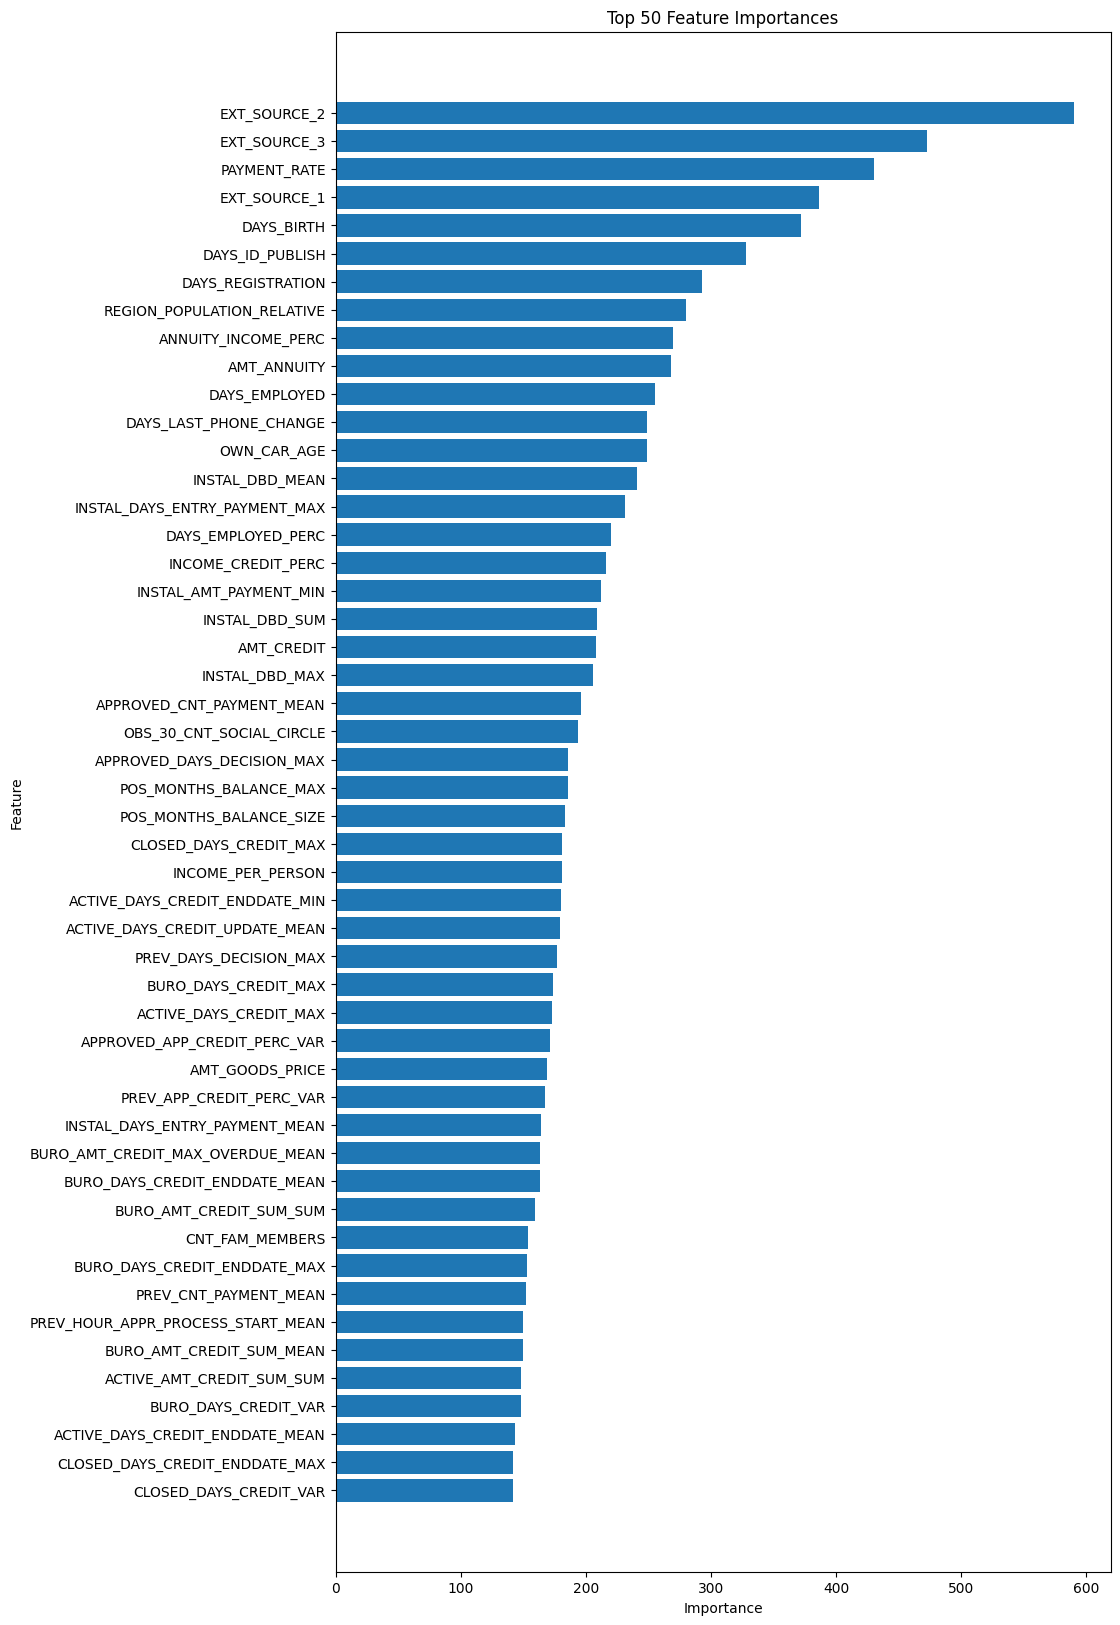

In [ ]:
#la visualisation de l'importance des features

#uniquement les 50 premières features par importance
top_50_features = importance_df.head(50)

plt.figure(figsize=(10, 20))
plt.barh(top_50_features['Feature'], top_50_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importances')
#pour que les plus importantes soient en haut
plt.gca().invert_yaxis()
plt.show()